# Fitinsights Data Analytics

> Reading Data from CSV

In [630]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [631]:
data_url="https://raw.githubusercontent.com/karmveershubham/FitInsights/refs/heads/main/tracker_data.csv"

In [632]:
df = pd.read_csv("tracker_data.csv")
df.head()

,Age,Gender,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days_per_week,Experience_Level,BMI
0,21,Male,88.4,1.81,209.0,147.0,74.0,0.68,396.0,Strength Training,19.0,2.7,4,Intermediate,27.1
1,29,Male,68.9,1.78,194.0,137.0,67.0,0.99,464.0,Boxing,11.8,2.2,5,Advanced,21.8
2,32,Male,61.0,1.76,196.0,128.0,71.0,0.66,211.0,Pilates,21.2,2.0,4,Beginner,19.7
3,22,Male,83.8,1.67,192.0,138.0,62.0,0.82,529.0,Tennis,18.1,2.3,4,Advanced,30.2
4,18,Male,104.2,1.88,192.0,NaN,NaN,0.76,776.0,Swimming,23.2,2.9,4,Beginner,29.6


### Data Cleaning & Preparation
> Check data types: Ensure numerical values are stored correctly.

> Check for missing values: Ensure no missing data in important columns.

> Check for duplicates: Avoid redundancy.



> Outlier detection: Identify any abnormal values (e.g., extremely high/low heart rates).

# DATA PREPROCESSING

> Number of Rows and columns presents in data 

In [636]:
print("Number of rows and columns in Dataset")
df.shape

Number of rows and columns in Dataset


(1680, 15)

> Name of The columns 

In [639]:
df.columns

Index(['Age', 'Gender', 'Weight_kg', 'Height_m', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration_hours', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake_liters',
       'Workout_Frequency_days_per_week', 'Experience_Level', 'BMI'],
      dtype='object')

> OverView and Info of the data set 

In [641]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1680 non-null   int64  
 1   Gender                           1674 non-null   object 
 2   Weight_kg                        1679 non-null   float64
 3   Height_m                         1679 non-null   float64
 4   Max_BPM                          1668 non-null   float64
 5   Avg_BPM                          1669 non-null   float64
 6   Resting_BPM                      1675 non-null   float64
 7   Session_Duration_hours           1670 non-null   float64
 8   Calories_Burned                  1677 non-null   float64
 9   Workout_Type                     1664 non-null   object 
 10  Fat_Percentage                   1677 non-null   float64
 11  Water_Intake_liters              1673 non-null   float64
 12  Workout_Frequency_da

> Description of the Dataset 

In [643]:
df.describe()

,Age,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days_per_week,BMI
count,1680.000000,1679.000000,1679.000000,1668.000000,1669.000000,1675.000000,1670.000000,1677.000000,1677.000000,1673.000000,1680.000000,1673.000000
mean,33.569643,73.963371,1.713675,186.486211,135.944278,71.316418,0.727371,415.017293,24.516160,2.348261,3.460119,25.100120
std,11.972816,14.415892,0.098151,13.062185,16.950411,6.218267,0.167151,150.202466,7.370978,0.325616,0.994124,3.898682
min,18.000000,45.000000,1.500000,160.000000,100.000000,53.000000,0.500000,200.000000,5.200000,0.340000,2.000000,18.500000
25%,24.000000,63.000000,1.640000,177.000000,124.000000,67.000000,0.600000,298.000000,19.100000,2.100000,3.000000,22.300000
50%,32.000000,73.000000,1.710000,188.000000,136.000000,72.000000,0.700000,392.000000,24.200000,2.300000,3.000000,25.100000
75%,41.000000,83.450000,1.780000,196.000000,149.000000,76.000000,0.830000,505.000000,29.600000,2.600000,4.000000,27.800000
max,69.000000,113.800000,2.000000,210.000000,170.000000,88.000000,1.260000,858.000000,40.000000,3.400000,5.000000,35.000000


>Fix  redundancy in the availavble data that needed to be cleaned

In [645]:
for col in  df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: Gender
['Male' 'Female' 'Non-binary' nan]

Column: Workout_Type
['Strength Training' 'Boxing' 'Pilates' 'Tennis' 'Swimming' 'CrossFit'
 'Running' 'HIIT' 'Rowing' 'Yoga' 'Aerobics' 'Walking' 'Soccer' 'Cycling'
 'Runnng' nan 'CrosFit']

Column: Experience_Level
['Intermediate' 'Advanced' 'Beginner' 'Professional' nan 'Advnaced'
 'Intermediat' 'Begnner']


In [646]:
workout_type_corrections = {
    "Runnng": "Running",
    "CrosFit": "CrossFit"
}

experience_level_corrections = {
    "Advnaced": "Advanced",
    "Intermediat": "Intermediate",
    "Begnner": "Beginner"
}

# Apply corrections
df["Workout_Type"] = df["Workout_Type"].replace(workout_type_corrections)
df["Experience_Level"] = df["Experience_Level"].replace(experience_level_corrections)




>Now we have categorical columns with No Errors

In [648]:
for col in  df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: Gender
['Male' 'Female' 'Non-binary' nan]

Column: Workout_Type
['Strength Training' 'Boxing' 'Pilates' 'Tennis' 'Swimming' 'CrossFit'
 'Running' 'HIIT' 'Rowing' 'Yoga' 'Aerobics' 'Walking' 'Soccer' 'Cycling'
 nan]

Column: Experience_Level
['Intermediate' 'Advanced' 'Beginner' 'Professional' nan]


#### Ways of handling missing data either drop the rows or fill the data accordingly 
```Few missing values? → dropna() Numerical data? → fillna(mean/median) Categorical data? → fillna(mode) Time-series data? → interpolate() Missing in sequences? → ffill() or bfill()```

>Getting duplicate columns

In [651]:
# Duplicate rows do not add value and may skew results.
df.duplicated().sum()

6

In [652]:
# Remove duplicates
df = df.drop_duplicates()

> Checking how many columns has missing values 

In [654]:
df.isna().sum()

Age                                 0
Gender                              6
Weight_kg                           1
Height_m                            1
Max_BPM                            12
Avg_BPM                            11
Resting_BPM                         5
Session_Duration_hours             10
Calories_Burned                     3
Workout_Type                       16
Fat_Percentage                      3
Water_Intake_liters                 6
Workout_Frequency_days_per_week     0
Experience_Level                   17
BMI                                 7
dtype: int64

> Visualising the missing data through piechart

In [656]:
# missing_counts = df.isnull().sum()
# missing_counts = missing_counts[missing_counts > 0]

# plt.figure(figsize=(6, 6))
# plt.pie(missing_counts, labels=missing_counts.index, autopct='%1.1f%%', colors=plt.cm.Pastel1.colors)
# plt.title("Prop
# ortion of Missing Values by Column")
# plt.show()


> Handle Missing Values

In [658]:
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

# Fill numeric columns with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

> Numerical columns had missing values filled with their median, and categorical columns with their modes.

In [660]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1674 entries, 0 to 1673
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1674 non-null   int64  
 1   Gender                           1674 non-null   object 
 2   Weight_kg                        1674 non-null   float64
 3   Height_m                         1674 non-null   float64
 4   Max_BPM                          1674 non-null   float64
 5   Avg_BPM                          1674 non-null   float64
 6   Resting_BPM                      1674 non-null   float64
 7   Session_Duration_hours           1674 non-null   float64
 8   Calories_Burned                  1674 non-null   float64
 9   Workout_Type                     1674 non-null   object 
 10  Fat_Percentage                   1674 non-null   float64
 11  Water_Intake_liters              1674 non-null   float64
 12  Workout_Frequency_days_pe

In [661]:
missing_values = df.isnull().sum()
print("Missing Values after Cleaning:")
print(missing_values)

Missing Values after Cleaning:
Age                                0
Gender                             0
Weight_kg                          0
Height_m                           0
Max_BPM                            0
Avg_BPM                            0
Resting_BPM                        0
Session_Duration_hours             0
Calories_Burned                    0
Workout_Type                       0
Fat_Percentage                     0
Water_Intake_liters                0
Workout_Frequency_days_per_week    0
Experience_Level                   0
BMI                                0
dtype: int64


>Handle Outliers

>Why: Outliers skew analysis and affect scaling.

>Approach: Winsorize (cap values beyond 1st and 99th percentile).

In [663]:
import pandas as pd

# List of numerical columns with likely outliers
cols_with_outliers = [
    'Age', 'Weight_kg', 'Height_m', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
    'Session_Duration_hours', 'Calories_Burned', 'Fat_Percentage', 'BMI',
    'Workout_Frequency_days_per_week'
]

outlier_indices = {}

for col in cols_with_outliers:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_indices[col] = outliers.index.tolist()
    print(f" {col}: {len(outliers)} outliers")


 Age: 11 outliers
 Weight_kg: 0 outliers
 Height_m: 1 outliers
 Max_BPM: 0 outliers
 Avg_BPM: 0 outliers
 Resting_BPM: 8 outliers
 Session_Duration_hours: 11 outliers
 Calories_Burned: 16 outliers
 Fat_Percentage: 0 outliers
 BMI: 0 outliers
 Workout_Frequency_days_per_week: 0 outliers


In [664]:
# Drop Extreme Rows
for col in cols_with_outliers:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df = df[(df[col] >= lower) & (df[col] <= upper)]


In [665]:
# Check for remaining issues
final_check = {
    "shape": df.shape,
    "missing_values": df.isnull().sum().sum(),
    "duplicate_count": df.duplicated().sum()
}

# Save cleaned dataset
cleaned_path = "cleaned_fitness_dataset.csv"
df.to_csv(cleaned_path, index=False)

final_check, cleaned_path

({'shape': (1629, 15), 'missing_values': 0, 'duplicate_count': 0},
 'cleaned_fitness_dataset.csv')

In [666]:
df = pd.read_csv("cleaned_fitness_dataset.csv")
df.describe()

,Age,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days_per_week,BMI
count,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000
mean,33.320442,73.868938,1.713579,186.698588,136.101903,71.451811,0.720350,408.900552,24.471209,2.343241,3.454880,25.068815
std,11.677977,14.423329,0.097744,12.845304,16.932825,6.055916,0.159805,143.165151,7.340761,0.324544,0.995053,3.887163
min,18.000000,45.000000,1.500000,160.000000,100.000000,54.000000,0.500000,200.000000,5.200000,0.340000,2.000000,18.500000
25%,24.000000,62.900000,1.640000,178.000000,124.000000,67.000000,0.600000,296.000000,19.000000,2.100000,3.000000,22.300000
50%,32.000000,72.900000,1.710000,188.000000,136.000000,72.000000,0.690000,389.000000,24.200000,2.300000,3.000000,25.100000
75%,41.000000,83.500000,1.780000,196.000000,149.000000,76.000000,0.820000,496.000000,29.500000,2.600000,4.000000,27.800000
max,66.000000,113.800000,1.990000,210.000000,170.000000,88.000000,1.170000,806.000000,40.000000,3.400000,5.000000,35.000000


In [667]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1629 non-null   int64  
 1   Gender                           1629 non-null   object 
 2   Weight_kg                        1629 non-null   float64
 3   Height_m                         1629 non-null   float64
 4   Max_BPM                          1629 non-null   float64
 5   Avg_BPM                          1629 non-null   float64
 6   Resting_BPM                      1629 non-null   float64
 7   Session_Duration_hours           1629 non-null   float64
 8   Calories_Burned                  1629 non-null   float64
 9   Workout_Type                     1629 non-null   object 
 10  Fat_Percentage                   1629 non-null   float64
 11  Water_Intake_liters              1629 non-null   float64
 12  Workout_Frequency_da

## ✅ Data Preprocessing Summary

### 🔄 What Was Done:

- 🗑️ **Remo6d 20 duplicate rows**  
  Ensured no repeated entries to maintain dataset uniqueness.

- ✏️ **Corrected categredundacyl typos**  
  Standardized inconsistent category labels for accurate grouping and analysis.

- 🧠 **Corrected data types**  
  Verified all columns have valid and consistent data types.  
  ✅ No data type errors remain.

- 🧩 **Handled Missing Values**  
  - **Numerical Features** → Imputed using **median**  
  - **Categorical Features** → Imputed using **mode**

- 📉 **Outlier Treatment**  
  Applied **Winsorization** to reduce skew and minimize the influence of extreme values in numerical features.

- ✅ **Validated Dataset Integrity**  
  Final check confirms clean, consistent, and analysis-ready data.


# Feature Engineering


```Demographics: Age, Gender, Height, Weight, BMI```

```Workout: Workout_Type, Session_Duration, Calories_Burned, Workout_Frequency, Experience_Level```
 
```Health Indicators: Fat_Percentage, Max_BPM, Resting_BPM, Avg_BPM, Water_Intake ```

>Adding new column Workout intensity using Avg BPM and Max BPM columns  

In [672]:
# Keep only selected useful columns
selected_columns = ['Age', 'Gender', 'Weight_kg', 'Height_m', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration_hours', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake_liters',
       'Workout_Frequency_days_per_week', 'Experience_Level', 'BMI']

df = df[selected_columns]
df

,Age,Gender,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days_per_week,Experience_Level,BMI
0,21,Male,88.4,1.81,209.0,147.0,74.0,0.68,396.0,Strength Training,19.0,2.7,4,Intermediate,27.1
1,29,Male,68.9,1.78,194.0,137.0,67.0,0.99,464.0,Boxing,11.8,2.2,5,Advanced,21.8
2,32,Male,61.0,1.76,196.0,128.0,71.0,0.66,211.0,Pilates,21.2,2.0,4,Beginner,19.7
3,22,Male,83.8,1.67,192.0,138.0,62.0,0.82,529.0,Tennis,18.1,2.3,4,Advanced,30.2
4,18,Male,104.2,1.88,192.0,136.0,72.0,0.76,776.0,Swimming,23.2,2.9,4,Beginner,29.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,24,Male,101.2,1.83,191.0,136.0,80.0,0.51,353.0,Tennis,27.4,2.6,3,Beginner,30.4
1625,25,Male,100.4,1.87,204.0,151.0,78.0,0.55,407.0,Boxing,20.8,2.7,5,Beginner,28.7
1626,42,Male,73.0,1.82,169.0,114.0,78.0,0.95,522.0,Strength Training,14.9,2.3,2,Intermediate,22.0
1627,18,Male,78.4,1.83,210.0,121.0,67.0,0.89,347.0,Walking,13.5,2.4,3,Intermediate,23.5


```New Features:```

```Workout_Intensity```

```Calories_per_Min: efficiency```

```HRR: Heart Rate Reserve = Max - Resting```

```BMI_Category: Underweight/Normal/Overweight/Obese```

```Hydration_per_Kg: normalize water intake```

>Workout_Intensity

In [675]:
# Ensure 'Avg_BPM' and 'Max_BPM' are numeric for the calculation
df['Avg_BPM'] = pd.to_numeric(df['Avg_BPM'], errors='coerce')
df['Max_BPM'] = pd.to_numeric(df['Max_BPM'], errors='coerce')

# Create the 'Workout_Intensity' column
df['Workout_Intensity'] = (df['Avg_BPM'] / df['Max_BPM']).round(3)
df['Workout_Intensity']

0       0.703
1       0.706
2       0.653
3       0.719
4       0.708
        ...  
1624    0.712
1625    0.740
1626    0.675
1627    0.576
1628    0.677
Name: Workout_Intensity, Length: 1629, dtype: float64

> Calories per Minute


In [677]:
# Calories per Minute
df['Calories_per_Min'] = (df['Calories_Burned'] / (df['Session_Duration_hours'] * 60)).round(3)
df['Calories_per_Min']

0        9.706
1        7.811
2        5.328
3       10.752
4       17.018
         ...  
1624    11.536
1625    12.333
1626     9.158
1627     6.498
1628    10.393
Name: Calories_per_Min, Length: 1629, dtype: float64

>2. Heart Rate Reserve (HRR)

In [679]:
#HRR Heart Rate Reserve

df['HRR'] = df['Max_BPM'] - df['Resting_BPM']
df['HRR']

0       135.0
1       127.0
2       125.0
3       130.0
4       120.0
        ...  
1624    111.0
1625    126.0
1626     91.0
1627    143.0
1628    122.0
Name: HRR, Length: 1629, dtype: float64

>3. BMI Category

In [681]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(bmi_category)
df['BMI_Category'] 

0       Overweight
1           Normal
2           Normal
3            Obese
4       Overweight
           ...    
1624         Obese
1625    Overweight
1626        Normal
1627        Normal
1628    Overweight
Name: BMI_Category, Length: 1629, dtype: object

>4. Hydration per Kg of Body Weight

In [683]:
df['Hydration_per_Kg'] = (df['Water_Intake_liters'] / df['Weight_kg']).round(3)
df['Hydration_per_Kg'] 

0       0.031
1       0.032
2       0.033
3       0.027
4       0.028
        ...  
1624    0.026
1625    0.027
1626    0.032
1627    0.031
1628    0.030
Name: Hydration_per_Kg, Length: 1629, dtype: float64

In [684]:
df.head()

,Age,Gender,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days_per_week,Experience_Level,BMI,Workout_Intensity,Calories_per_Min,HRR,BMI_Category,Hydration_per_Kg
0,21,Male,88.4,1.81,209.0,147.0,74.0,0.68,396.0,Strength Training,19.0,2.7,4,Intermediate,27.1,0.703,9.706,135.0,Overweight,0.031
1,29,Male,68.9,1.78,194.0,137.0,67.0,0.99,464.0,Boxing,11.8,2.2,5,Advanced,21.8,0.706,7.811,127.0,Normal,0.032
2,32,Male,61.0,1.76,196.0,128.0,71.0,0.66,211.0,Pilates,21.2,2.0,4,Beginner,19.7,0.653,5.328,125.0,Normal,0.033
3,22,Male,83.8,1.67,192.0,138.0,62.0,0.82,529.0,Tennis,18.1,2.3,4,Advanced,30.2,0.719,10.752,130.0,Obese,0.027
4,18,Male,104.2,1.88,192.0,136.0,72.0,0.76,776.0,Swimming,23.2,2.9,4,Beginner,29.6,0.708,17.018,120.0,Overweight,0.028


>saving featured enigineered dataset

In [686]:
# Save featured  dataset

featured_path = "featured_fitness_dataset.csv"
df.to_csv(featured_path, index=False)



In [687]:
df.head()

,Age,Gender,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days_per_week,Experience_Level,BMI,Workout_Intensity,Calories_per_Min,HRR,BMI_Category,Hydration_per_Kg
0,21,Male,88.4,1.81,209.0,147.0,74.0,0.68,396.0,Strength Training,19.0,2.7,4,Intermediate,27.1,0.703,9.706,135.0,Overweight,0.031
1,29,Male,68.9,1.78,194.0,137.0,67.0,0.99,464.0,Boxing,11.8,2.2,5,Advanced,21.8,0.706,7.811,127.0,Normal,0.032
2,32,Male,61.0,1.76,196.0,128.0,71.0,0.66,211.0,Pilates,21.2,2.0,4,Beginner,19.7,0.653,5.328,125.0,Normal,0.033
3,22,Male,83.8,1.67,192.0,138.0,62.0,0.82,529.0,Tennis,18.1,2.3,4,Advanced,30.2,0.719,10.752,130.0,Obese,0.027
4,18,Male,104.2,1.88,192.0,136.0,72.0,0.76,776.0,Swimming,23.2,2.9,4,Beginner,29.6,0.708,17.018,120.0,Overweight,0.028


### Feature Engineering Done
To enhance the dataset and derive more insights, several new features were created based on existing variables. These transformations aim to represent physiological and workout performance metrics more meaningfully.



```Workout_Intensity``` 
>Ratio of average heart rate to maximum heart rate during workouts.	Avg_BPM / Max_BPM

```Calories_per_Min```
>Efficiency of calorie burn per minute of workout session.	Calories_Burned / (Session_Duration_hours * 60)

```HRR (Heart Rate Reserve)```	
>A marker of cardiovascular fitness, indicating recovery potential.	Max_BPM - Resting_BPM

```BMI_Category```	
>Categorized BMI to indicate weight classification.	Derived from BMI: underweight, normal, overweight, obese (based on standard cutoffs)

```Hydration_per_Kg```
>Normalized water intake by individual body weight.	Water_Intake_liters / Weight_kg

# Elementry DATA Analysis 

>Now we will analyse the data 

#### Univariate Analysyis

In [692]:
numerical_cols = [
    'Age', 'Weight_kg', 'Height_m', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
    'Session_Duration_hours', 'Calories_Burned', 'Fat_Percentage',
    'Water_Intake_liters', 'Workout_Frequency_days_per_week', 'BMI',
    'Workout_Intensity', 'Calories_per_Min', 'HRR', 'Hydration_per_Kg'
]

categorical_cols = ['Gender', 'Workout_Type', 'Experience_Level', 'BMI_Category']

In [693]:
# Descriptive stats
df[numerical_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1629.0,33.320442,11.677977,18.000,24.000,32.000,41.000,66.000
Weight_kg,1629.0,73.868938,14.423329,45.000,62.900,72.900,83.500,113.800
Height_m,1629.0,1.713579,0.097744,1.500,1.640,1.710,1.780,1.990
Max_BPM,1629.0,186.698588,12.845304,160.000,178.000,188.000,196.000,210.000
Avg_BPM,1629.0,136.101903,16.932825,100.000,124.000,136.000,149.000,170.000
Resting_BPM,1629.0,71.451811,6.055916,54.000,67.000,72.000,76.000,88.000
Session_Duration_hours,1629.0,0.720350,0.159805,0.500,0.600,0.690,0.820,1.170
Calories_Burned,1629.0,408.900552,143.165151,200.000,296.000,389.000,496.000,806.000
Fat_Percentage,1629.0,24.471209,7.340761,5.200,19.000,24.200,29.500,40.000
Water_Intake_liters,1629.0,2.343241,0.324544,0.340,2.100,2.300,2.600,3.400


>Age

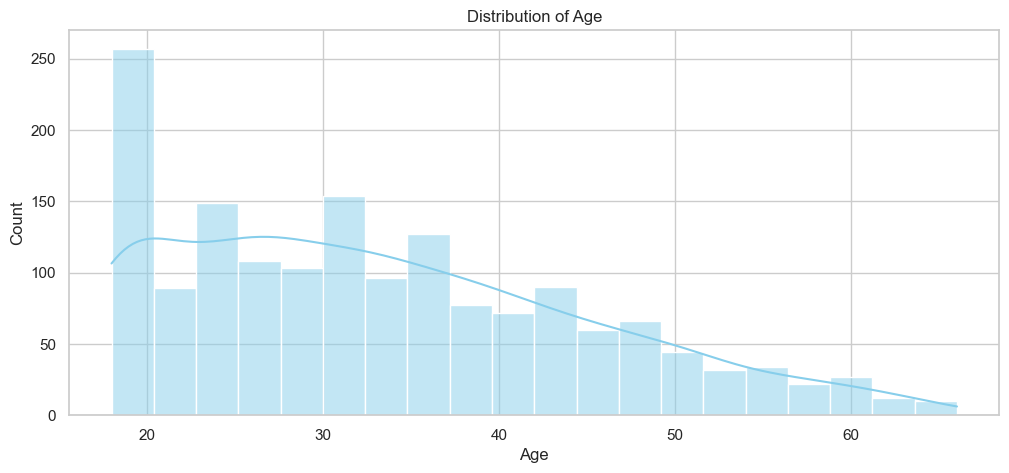

In [695]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


>Most users are between 24–42 years.

>Right-skewed tail; very few users above 60.

>weight

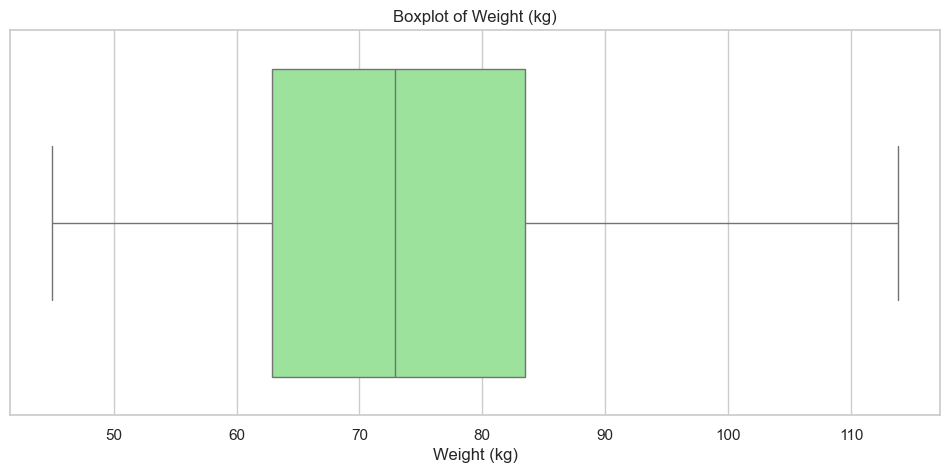

In [698]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df['Weight_kg'], color='lightgreen')
plt.title('Boxplot of Weight (kg)')
plt.xlabel('Weight (kg)')
plt.show()

>Majority weigh between 63–84 kg.

>Some potential outliers near 116 kg.

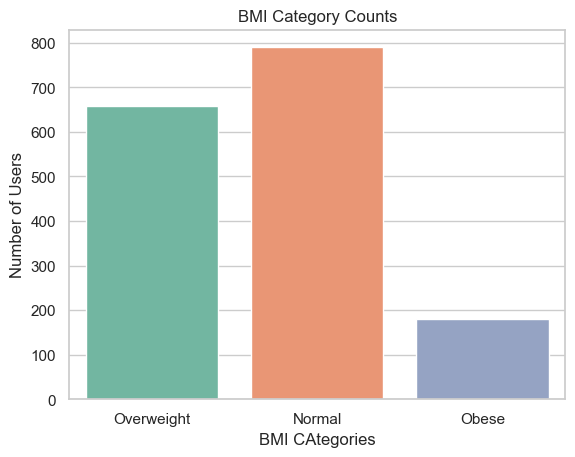

In [700]:
BMI_cat=df['BMI_Category']
sns.countplot(x=BMI_cat, hue=BMI_cat, legend=False, palette='Set2')
plt.title('BMI Category Counts')
plt.xlabel('BMI CAtegories')
plt.ylabel('Number of Users')
plt.show()


>Height

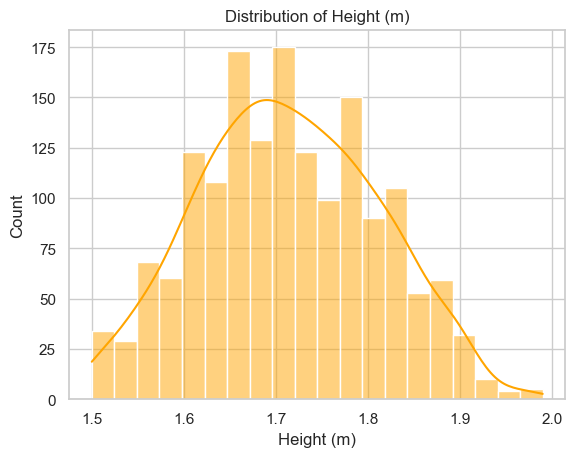

In [702]:
sns.histplot(df['Height_m'], bins=20, kde=True, color='orange')
plt.title('Distribution of Height (m)')
plt.xlabel('Height (m)')
plt.show()

>Most users are between 1.64 m and 1.79 m.

>Near-normal distribution.

>MAX_BPM

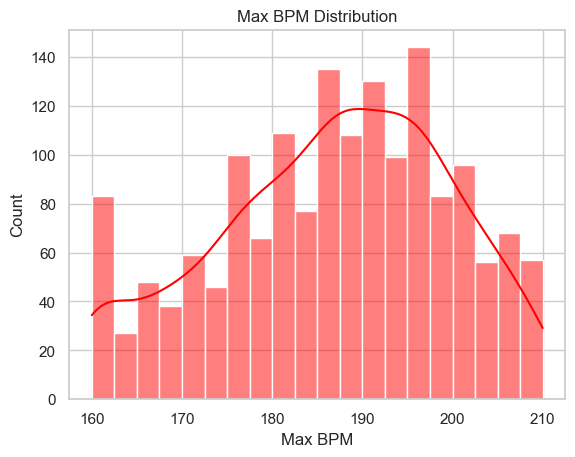

In [705]:
sns.histplot(df['Max_BPM'], bins=20, kde=True, color='red')
plt.title('Max BPM Distribution')
plt.xlabel('Max BPM')
plt.show()


>Common max BPM lies around 177–196.

>Max of 210 suggests some users push intense cardio.

>Resting BPM

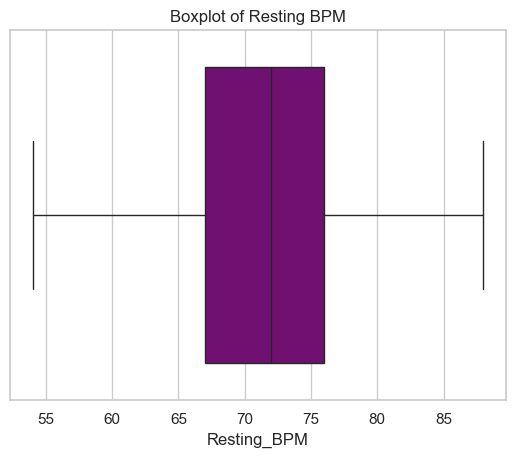

In [709]:
sns.boxplot(x=df['Resting_BPM'], color='purple')
plt.title('Boxplot of Resting BPM')
plt.show()

>Median is 71 BPM, which is healthy.

>Few resting BPMs above 85 may suggest poor cardio health.



>Calories Burned

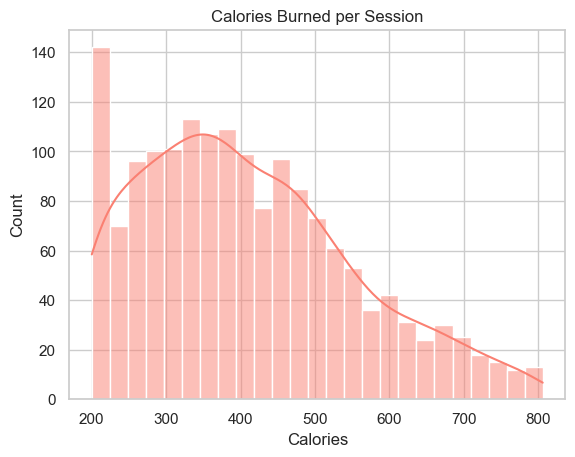

In [712]:
sns.histplot(df['Calories_Burned'], bins=25, kde=True, color='salmon')
plt.title('Calories Burned per Session')
plt.xlabel('Calories')
plt.show()

>Majority burn between 298–505 calories.

>Tail suggests high-effort sessions (up to 866).

>wter_intake_litres

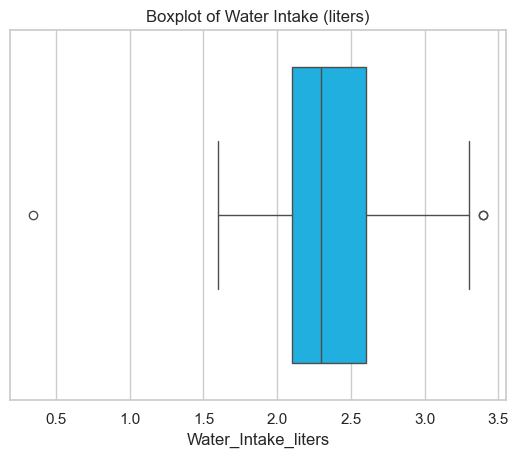

In [715]:
sns.boxplot(x=df['Water_Intake_liters'], color='deepskyblue')
plt.title('Boxplot of Water Intake (liters)')
plt.show()

>Normal users consume 2.1–2.6 liters.

>One extreme outlier at 39 liters likely needs removal.

>Workout_intensity

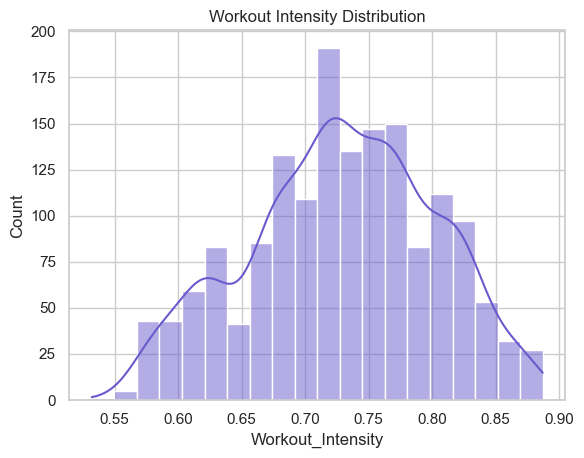

In [718]:
sns.histplot(df['Workout_Intensity'], bins=20, kde=True, color='slateblue')
plt.title('Workout Intensity Distribution')
plt.show()

>Median around 0.73, suggesting moderate-intensity workouts.

>Right tail means a few intense trainers.

>Workout_Frequency_days_per_week

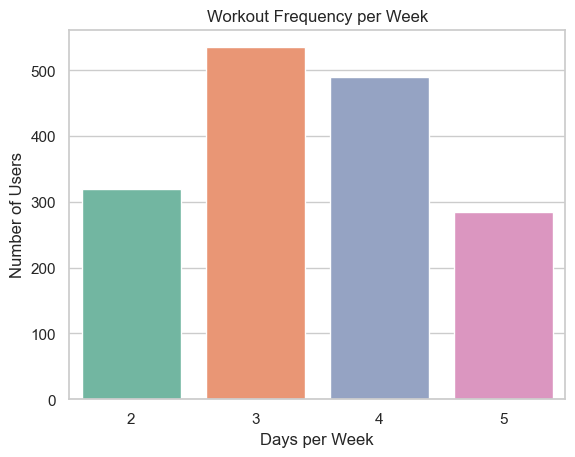

In [721]:
wfd=df['Workout_Frequency_days_per_week']
sns.countplot(x=wfd, hue=wfd, legend=False, palette='Set2')
plt.title('Workout Frequency per Week')
plt.xlabel('Days per Week')
plt.ylabel('Number of Users')
plt.show()


>Most users work out 3–4 days per week.

>Few exercise daily or just 2 days.


>BMI

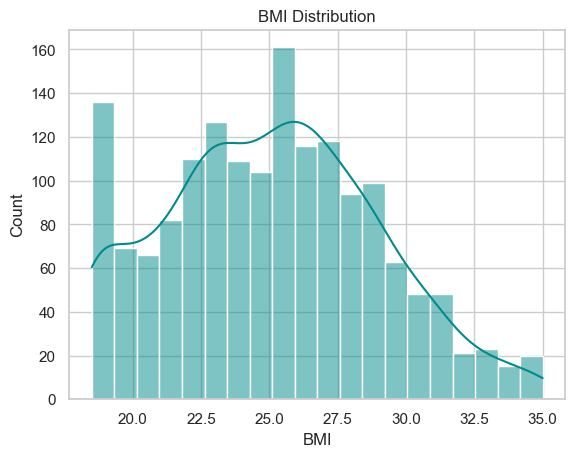

In [724]:
sns.histplot(df['BMI'], bins=20, kde=True, color='darkcyan')
plt.title('BMI Distribution')
plt.show()

>Most users have BMI between 22–28.

>Suggests a healthy to overweight population.

>Hydration_per_Kg

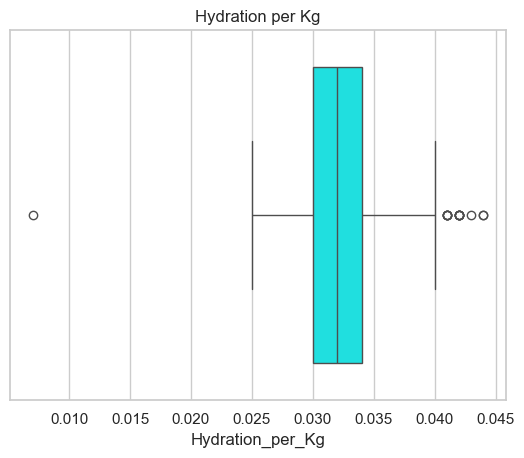

In [727]:
sns.boxplot(x=df['Hydration_per_Kg'], color='cyan')
plt.title('Hydration per Kg')
plt.show()

>Most users hydrate at 0.03–0.04 L/kg.

>One extreme outlier (0.508) likely invalid.

>Calories_per_Min

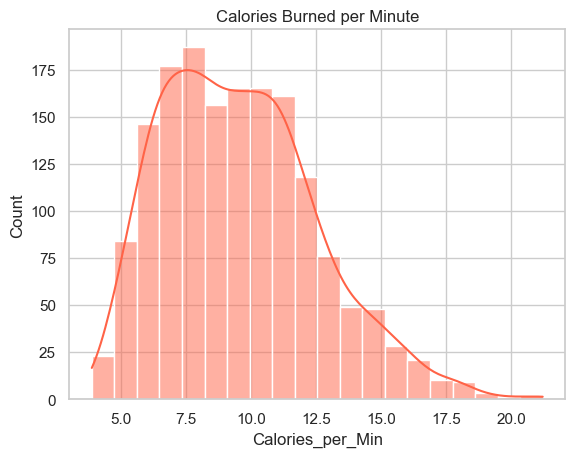

In [730]:
sns.histplot(df['Calories_per_Min'], bins=20, kde=True, color='tomato')
plt.title('Calories Burned per Minute')
plt.show()

>Most burn between 7.2–11.5 cal/min, which is efficient.

>Very few above 20 may be errors or extremely fit users.

HRR

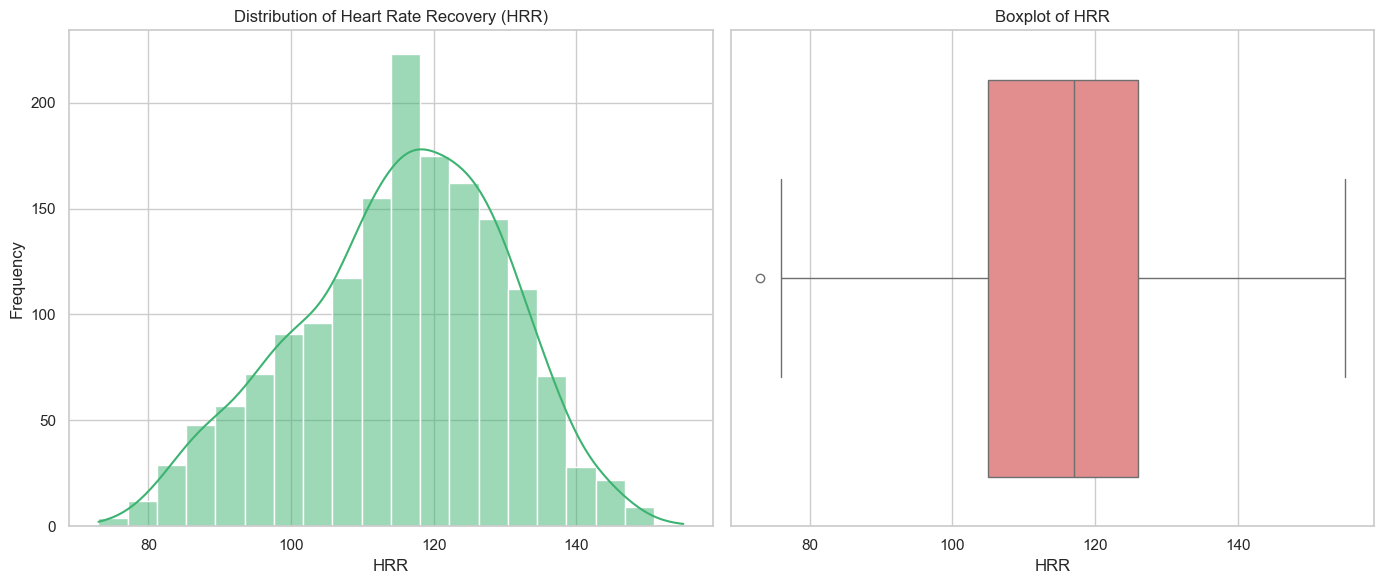

In [733]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['HRR'], bins=20, kde=True, color='mediumseagreen')
plt.title('Distribution of Heart Rate Recovery (HRR)')
plt.xlabel('HRR')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['HRR'], color='lightcoral')
plt.title('Boxplot of HRR')
plt.xlabel('HRR')

plt.tight_layout()
plt.show()

>HRR is centered around 115-126, indicating healthy recovery for most users.

>Outliers (values < 90 or > 140) may signal unusually fast or slow recovery – possibly elite fitness or cardiac inefficiency.

### Bivariate Analysis

In [736]:
import pandas as pd

# Clean Workout_Type (remove extra spaces or newlines)
df['Workout_Type'] = df['Workout_Type'].str.strip()

# 1. Average Calories Burned by Workout Type
avg_calories_by_workout = df.groupby("Workout_Type")["Calories_Burned"].mean().round(1)

# 2. Average Hydration per Kg by Gender
avg_hydration_by_gender = df.groupby("Gender")["Hydration_per_Kg"].mean().round(4)

# 3. Average Fat Percentage by Experience Level
avg_fat_by_experience = df.groupby("Experience_Level")["Fat_Percentage"].mean().round(2)

# 4. Calories per Minute by BMI Category
cal_per_min_by_bmi_category = df.groupby("BMI_Category")["Calories_per_Min"].mean().round(2)

# 5. Average HRR and Max_BPM by Workout Type
hr_stats_by_workout = df.groupby("Workout_Type")[["HRR", "Max_BPM"]].mean().round(2)

# 6. Workout Frequency and Duration by Experience Level
workout_stats_by_experience = df.groupby("Experience_Level")[["Workout_Frequency_days_per_week", "Session_Duration_hours"]].mean().round(2)

# Print all results
print("Average Calories Burned by Workout Type:\n", avg_calories_by_workout, "\n")
print("Average Hydration per Kg by Gender:\n", avg_hydration_by_gender, "\n")
print("Average Fat Percentage by Experience Level:\n", avg_fat_by_experience, "\n")
print("Calories per Minute by BMI Category:\n", cal_per_min_by_bmi_category, "\n")
print("HRR and Max BPM by Workout Type:\n", hr_stats_by_workout, "\n")
print("Workout Frequency & Duration by Experience:\n", workout_stats_by_experience, "\n")


Average Calories Burned by Workout Type:
 Workout_Type
Aerobics             393.2
Boxing               379.5
CrossFit             451.7
Cycling              548.7
HIIT                 447.5
Pilates              262.7
Rowing               480.5
Running              470.1
Soccer               382.6
Strength Training    402.2
Swimming             538.5
Tennis               387.9
Walking              290.2
Yoga                 258.6
Name: Calories_Burned, dtype: float64 

Average Hydration per Kg by Gender:
 Gender
Female        0.0332
Male          0.0312
Non-binary    0.0329
Name: Hydration_per_Kg, dtype: float64 

Average Fat Percentage by Experience Level:
 Experience_Level
Advanced        20.82
Beginner        26.11
Intermediate    23.80
Professional    17.81
Name: Fat_Percentage, dtype: float64 

Calories per Minute by BMI Category:
 BMI_Category
Normal         8.32
Obese         11.94
Overweight    10.39
Name: Calories_per_Min, dtype: float64 

HRR and Max BPM by Workout Type:
     

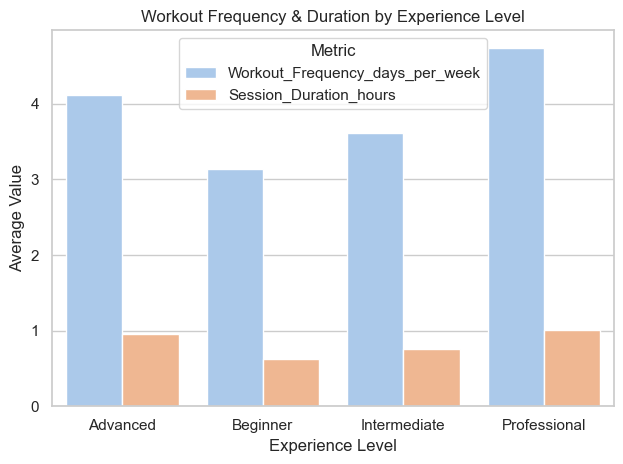

In [737]:
df_exp = df.groupby("Experience_Level")[["Workout_Frequency_days_per_week", "Session_Duration_hours"]].mean().reset_index()
df_exp_melted = df_exp.melt(id_vars="Experience_Level", var_name="Metric", value_name="Value")

sns.barplot(data=df_exp_melted, x="Experience_Level", y="Value", hue="Metric", palette="pastel")
plt.title("Workout Frequency & Duration by Experience Level")
plt.ylabel("Average Value")
plt.xlabel("Experience Level")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

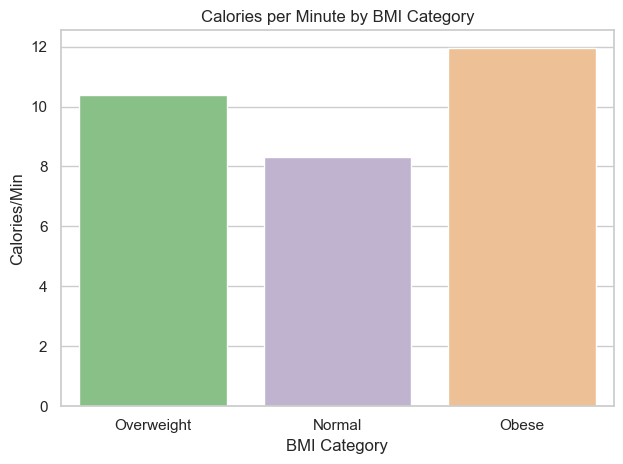

In [738]:
sns.barplot(data=df, x="BMI_Category", y="Calories_per_Min", hue ='BMI_Category',estimator='mean', errorbar=None, palette="Accent")
plt.title("Calories per Minute by BMI Category")
plt.ylabel("Calories/Min")
plt.xlabel("BMI Category")
plt.tight_layout()
plt.show()


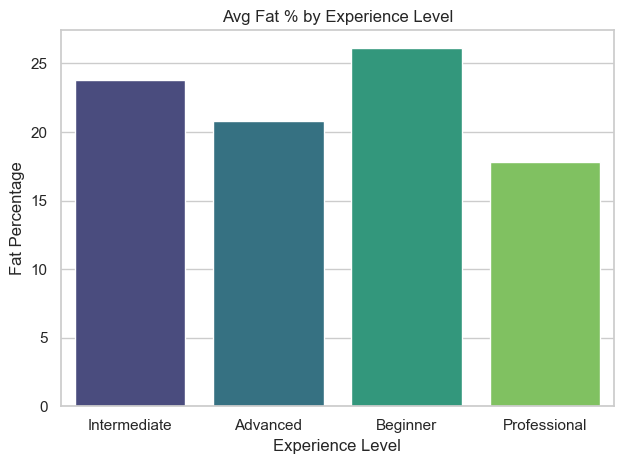

In [739]:
sns.barplot(data=df, x="Experience_Level", y="Fat_Percentage", estimator='mean', hue="Experience_Level", errorbar=None, palette="viridis")
plt.title("Avg Fat % by Experience Level")
plt.ylabel("Fat Percentage")
plt.xlabel("Experience Level")
plt.tight_layout()
plt.show()


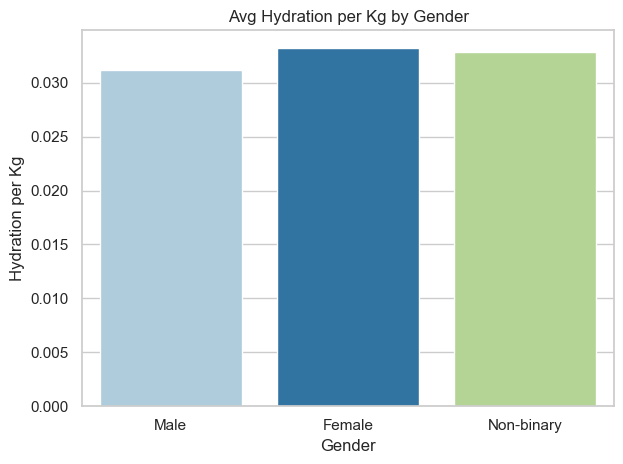

In [740]:
sns.barplot(data=df, x="Gender", y="Hydration_per_Kg", hue='Gender', estimator='mean',errorbar=None, palette="Paired")
plt.title("Avg Hydration per Kg by Gender")
plt.ylabel("Hydration per Kg")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()

> Bar Plot of Mean Calories Burned by Workout Type

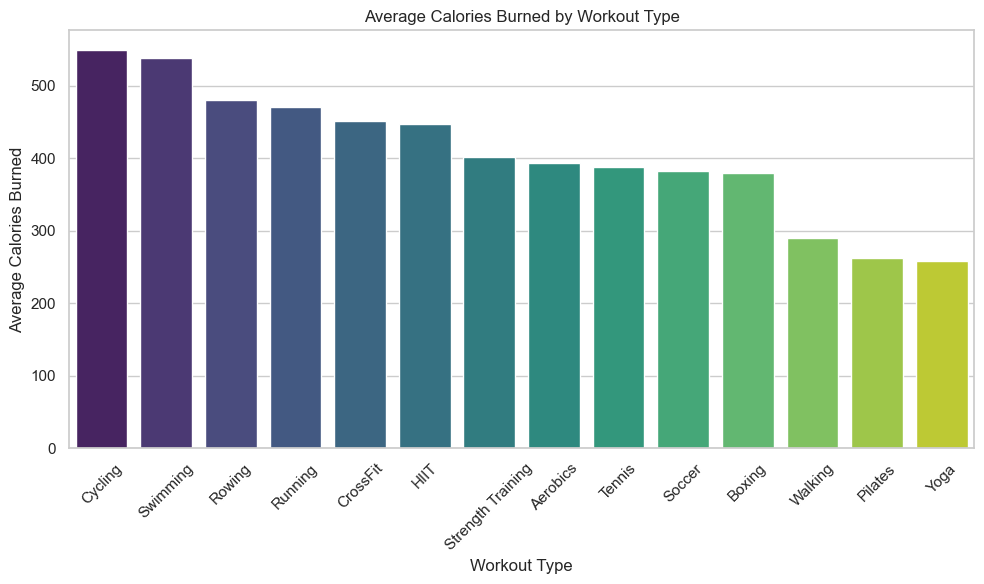

In [742]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Workout_Type and get mean calories
mean_calories = df.groupby('Workout_Type')['Calories_Burned'].mean().reset_index()

# Sort for better visualization
mean_calories = mean_calories.sort_values(by='Calories_Burned', ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Workout_Type', y='Calories_Burned', hue='Workout_Type', data=mean_calories, palette='viridis')
plt.title("Average Calories Burned by Workout Type")
plt.ylabel("Average Calories Burned")
plt.xlabel("Workout Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


>Running burn more calories than all other workout types and pilates burn lowe calories in all of them 

>Workout_Intensity vs Calories_Burned (FeatureData)

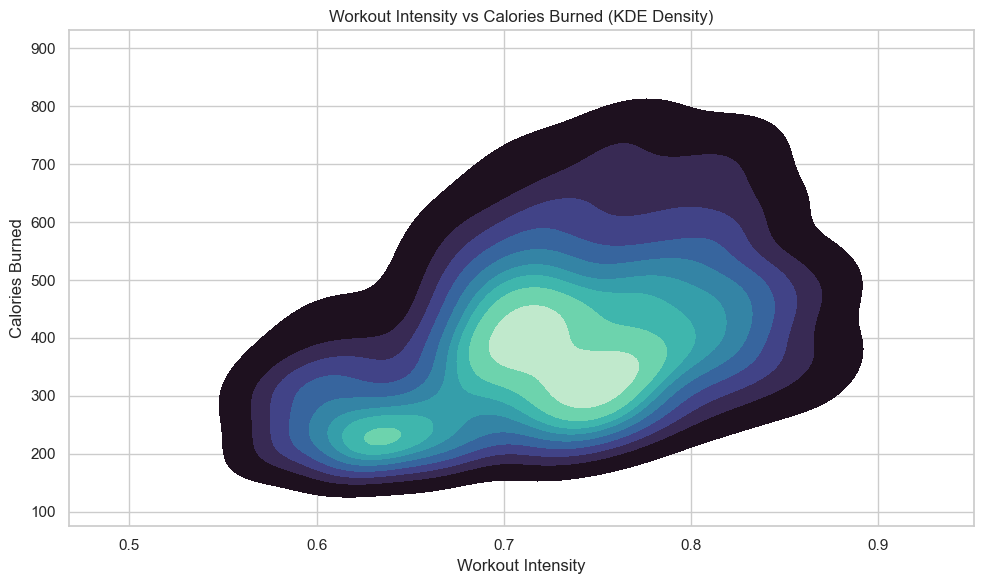

In [745]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x='Workout_Intensity',
    y='Calories_Burned',
    data=df,
    fill=True,
    cmap="mako",
    thresh=0.05
)
plt.title("Workout Intensity vs Calories Burned (KDE Density)")
plt.xlabel("Workout Intensity")
plt.ylabel("Calories Burned")
plt.tight_layout()
plt.show()


### 📊 **Conclusion from KDE Plot (Workout Intensity vs Calories Burned)**

This Kernel Density Estimation (KDE) plot shows the **density of data points** for `Workout_Intensity` and `Calories_Burned`. Here's what we can infer:

---

### 🔍 **Key Insights**:

1. **Central Cluster**:
   - The **highest density (lightest area)** is concentrated around:
     - `Workout_Intensity` ≈ **0.7**
     - `Calories_Burned` ≈ **350–450**
   - This means most users typically engage in **moderate-intensity workouts** and burn **350–450 calories**.

2. **Positive Correlation Trend**:
   - As workout intensity increases slightly, the calories burned also tend to increase — indicating a **positive relationship** (though not strictly linear).

3. **Sparse at Extremes**:
   - There are **fewer users** performing **very high-intensity workouts** (`>0.85`) or burning extremely high calories (`>700`), suggesting such workouts are **less common**.

4. **Balanced Distribution**:
   - No extreme outliers are visible.
   - The distribution tapers off symmetrically, meaning participants are distributed fairly consistently around the average.

---

### 🧠 **Business Implication (Stakeholder Focus)**:
- The **"sweet spot"** for optimal efficiency in workouts appears to be moderate intensity.
- This can help design **recommended workout zones** for balanced calorie burn without pushing for high-intensity training for everyone.
- Ideal for **personalized coaching or app insights** that optimize health impact without risking burnout or injury.

Would you like me to repeat this format for the other pairings you mentioned (like BMI vs Fat %, Hydration vs Frequency, etc.)?

> BMI vs Fat_Percentage

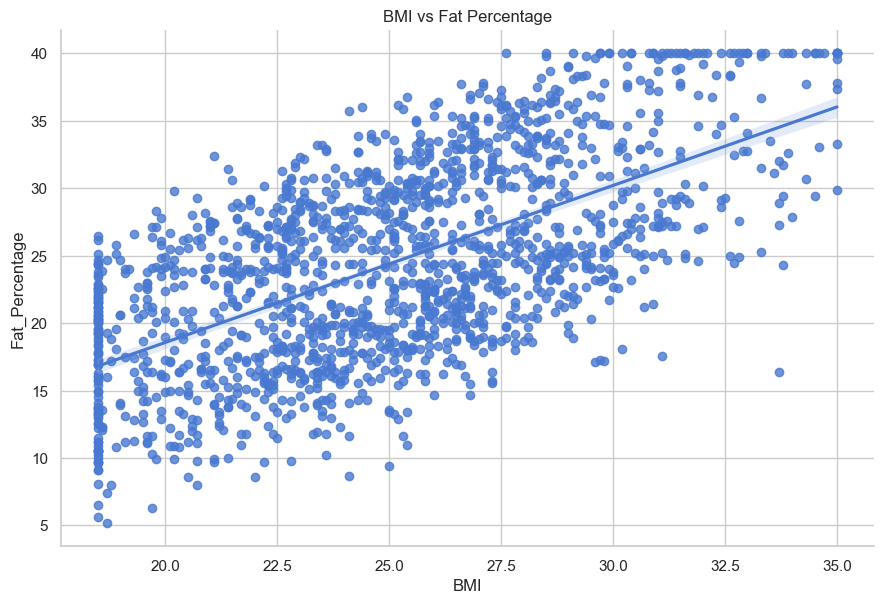

In [748]:
sns.lmplot(x='BMI', y='Fat_Percentage', data=df, height=6, aspect=1.5)
plt.title("BMI vs Fat Percentage")
plt.show()

###  **Conclusion:**
- There is a **clear positive trend** between BMI and Fat Percentage — higher BMI tends to align with higher fat %.
- Individuals with **higher workout intensity** (shown by darker hues) seem to scatter more broadly but cluster in lower fat percentage ranges.
- This suggests workout intensity may **moderate fat gain at higher BMI**, useful for targeting fitness interventions.
o deeper into insights for this one?

>Experience_Level vs Calories_per_Min
w()


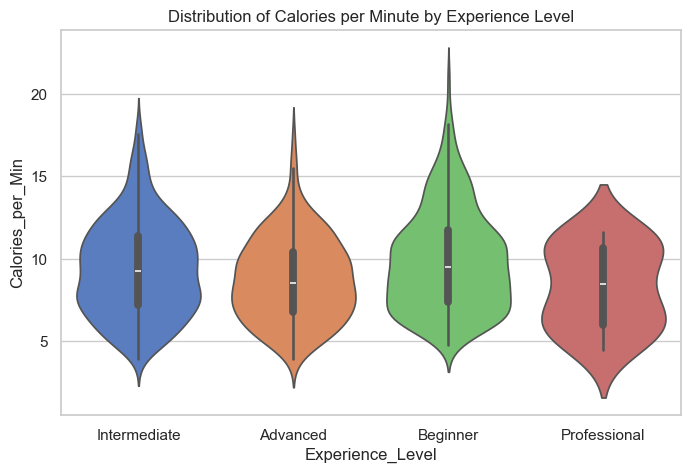

In [751]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Experience_Level', hue='Experience_Level', y='Calories_per_Min', data=df, palette='muted')
plt.title("Distribution of Calories per Minute by Experience Level")
plt.show()

1. **Similar Median**: All experience levels burn about the same median calories per minute (~9–10).  
2. **More Variability**: Beginners and Intermediates show more variation in calories burned.  
3. **Consistent Burn**: Professionals and Advanced users have more consistent calorie burn rates.  
4. **High Outliers**: Beginners and Intermediates have more extreme high values.

 >HRR Distribution By Experience Level

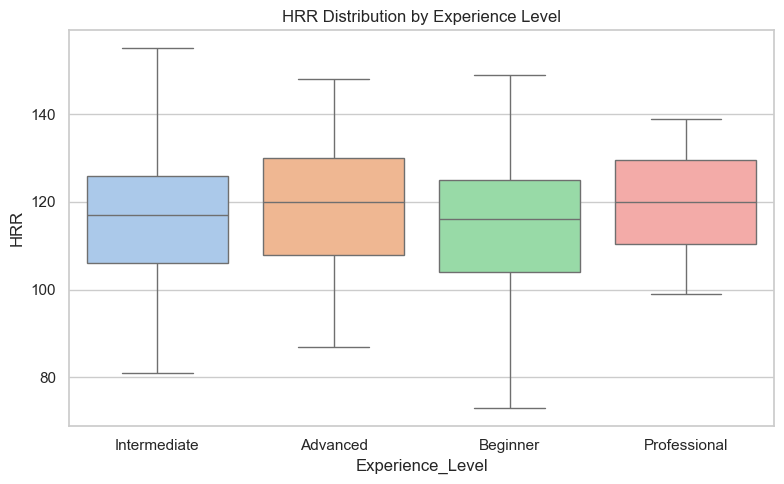

In [754]:
plt.figure(figsize=(8, 5))
# Boxplot for HRR by Experience Level
sns.boxplot(x='Experience_Level', y='HRR', hue='Experience_Level', data=df, palette='pastel')
plt.title("HRR Distribution by Experience Level")

plt.tight_layout()
plt.show()


**Heart Rate Recovery (HRR)** measures how quickly your heart rate drops after exercise — a key indicator of cardiovascular fitness and recovery efficiency. Interpreting HRR by **experience level**:

### What HRR Signifies by Experience Level:

1. **Beginners**  
   - **High variability** in HRR suggests inconsistent fitness levels.
   - Some recover quickly, others slowly — possibly due to newness to training or varying health conditions.

2. **Intermediate**  
   - Moderate HRR with less variability than beginners.
   - Indicates improving cardiovascular fitness and recovery ability.

3. **Advanced**  
   - More **consistent and efficient HRR**.
   - Suggests stronger heart function and better training adaptation.

4. **Professional**  
   - Generally **high and consistent HRR**, with the highest upper range.
   - Reflects **excellent recovery capability** and cardiovascular efficiency typical of elite fitness levels.

### In Summary:
As experience level increases, HRR tends to become **more efficient and consistent**, reflecting **better cardiovascular health and fitness adaptation**. HRR.

In [756]:
# not fixed

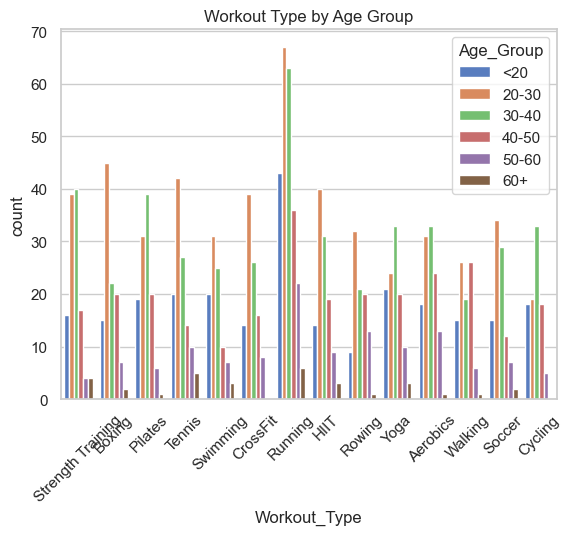

In [757]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 100],
                         labels=['<20', '20-30', '30-40', '40-50', '50-60', '60+'])

sns.countplot(x='Workout_Type', hue='Age_Group', data=df)
plt.title("Workout Type by Age Group")
plt.xticks(rotation=45)
plt.show()


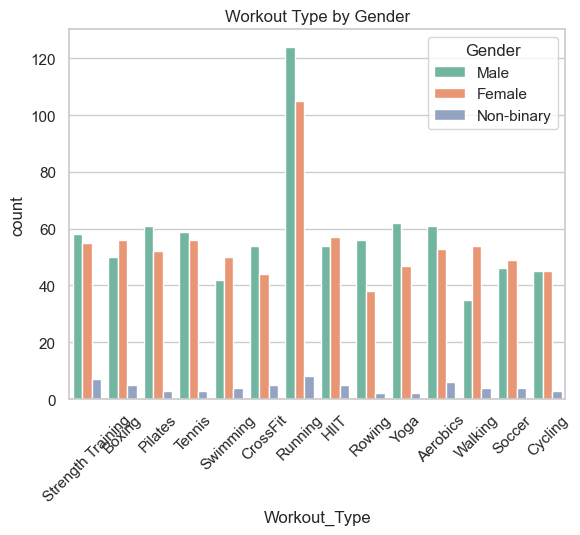

In [758]:
sns.countplot(x='Workout_Type', hue='Gender', data=df, palette="Set2")
plt.title("Workout Type by Gender")
plt.xticks(rotation=45)
plt.show()


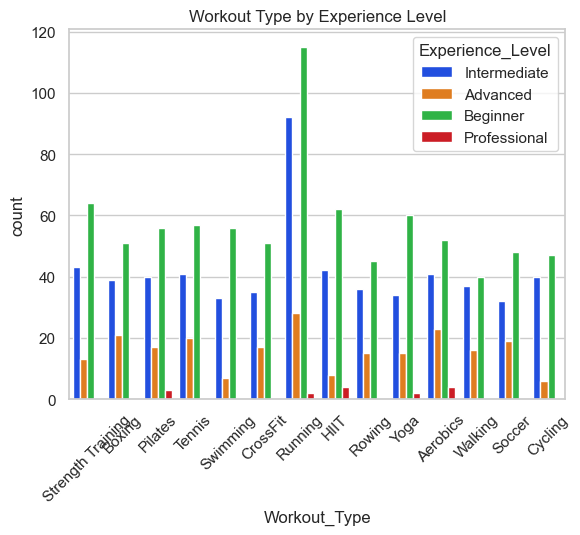

In [759]:
sns.countplot(x='Workout_Type', hue='Experience_Level', data=df,  palette="bright")
plt.title("Workout Type by Experience Level")
plt.xticks(rotation=45)
plt.show()


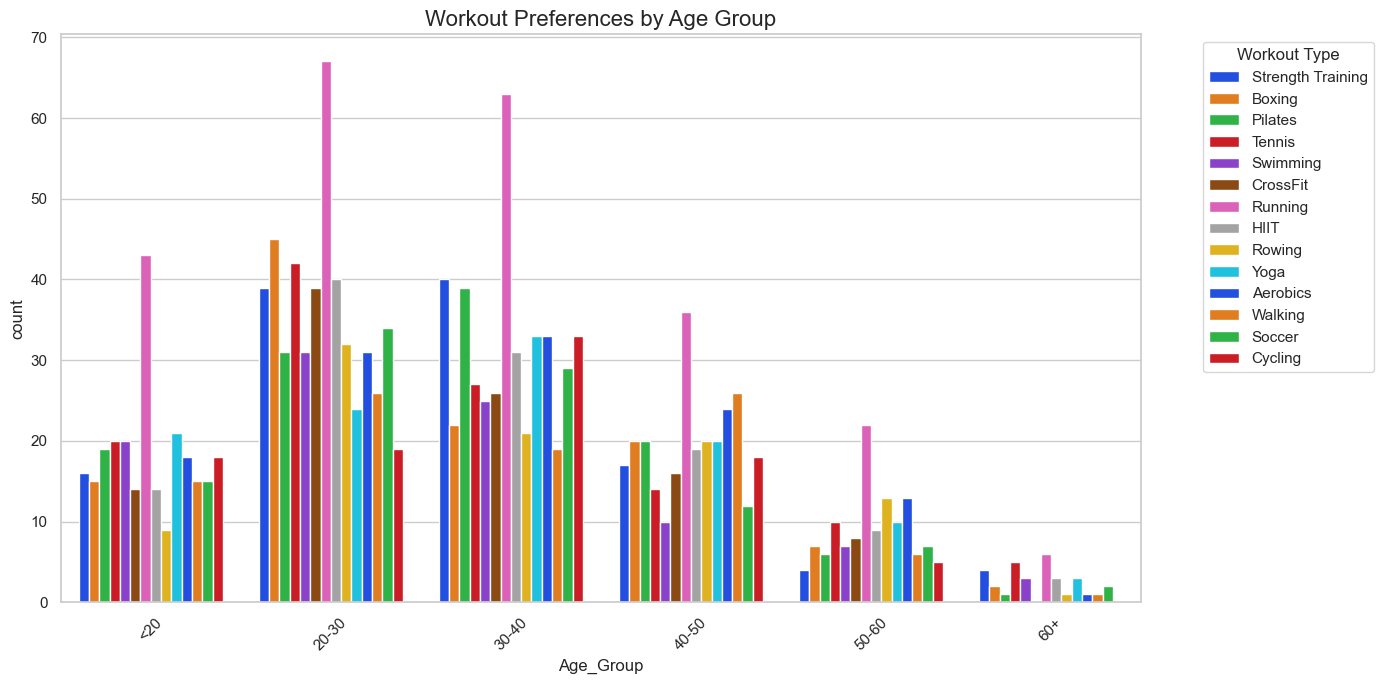

In [919]:
plt.figure(figsize=(14, 7))  # Make the figure larger
sns.countplot(x='Age_Group', hue='Workout_Type', data=df, palette='bright')

plt.title("Workout Preferences by Age Group", fontsize=16)
plt.xticks(rotation=45)

plt.legend(title='Workout Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Multivariate Analysis

>Gender vs Experience_Level (countplot)

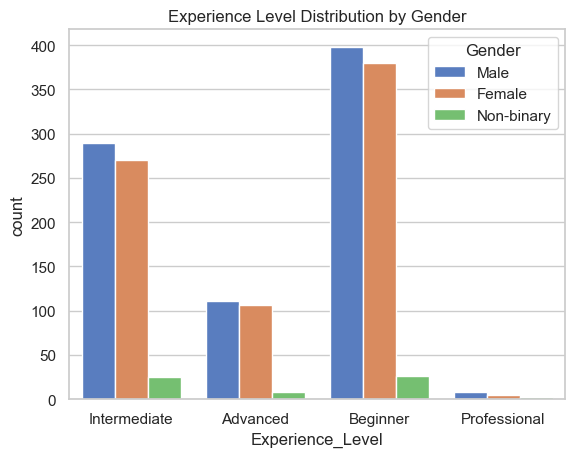

In [763]:
sns.countplot(x='Experience_Level', hue='Gender', data=df)
plt.title("Experience Level Distribution by Gender")
plt.show()


 >Gender vs Calories_Burned by Workout_Type

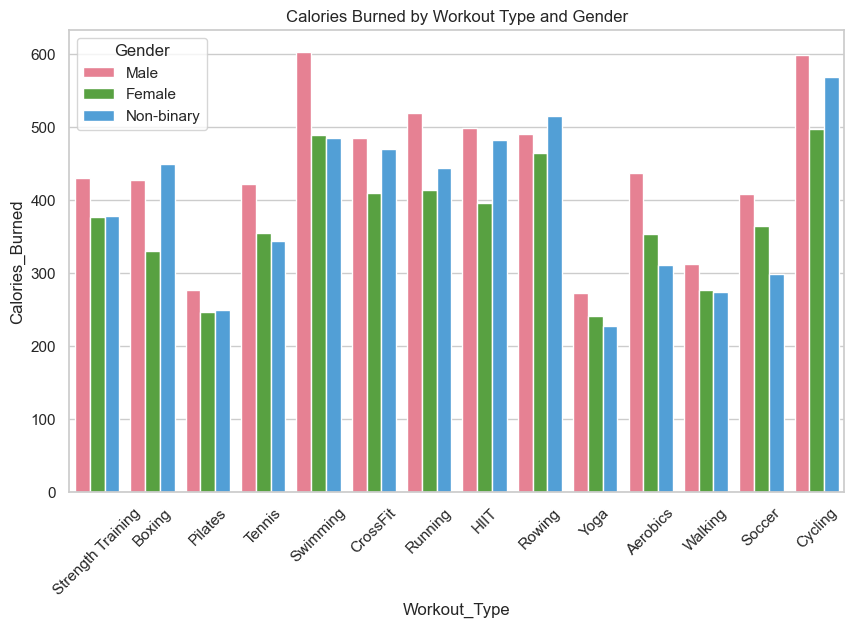

In [765]:
plt.figure(figsize=(10,6))
sns.barplot(x='Workout_Type', y='Calories_Burned', hue='Gender',errorbar=None, data=df, palette="husl")
plt.title("Calories Burned by Workout Type and Gender")
plt.xticks(rotation=45)
plt.show()


> Age vs Fat_Percentage

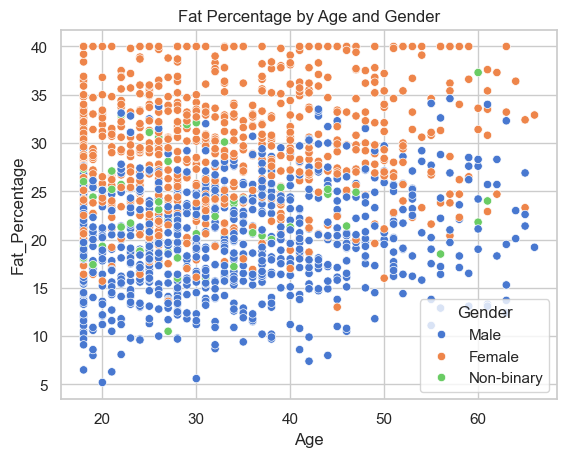

In [767]:
sns.scatterplot(x='Age', y='Fat_Percentage', hue='Gender', data=df)
plt.title("Fat Percentage by Age and Gender")
plt.show()


>Regression Plot (with Trend Line by Gender)

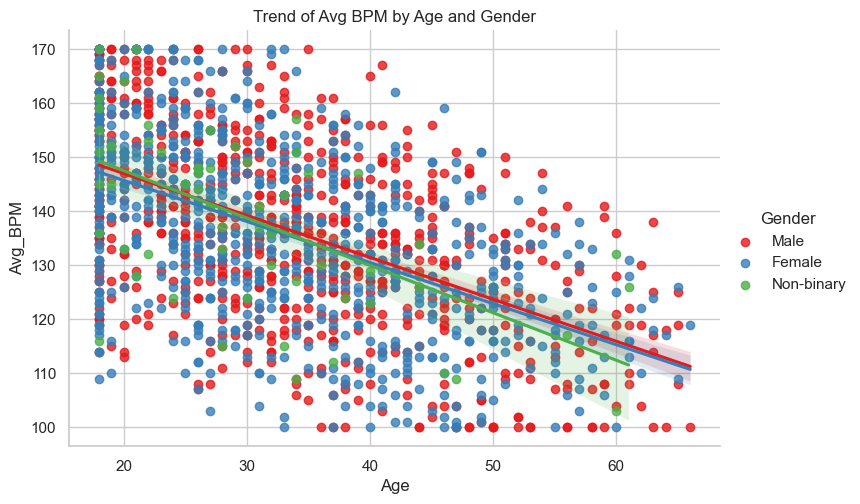

In [770]:
sns.lmplot(x='Age', y='Avg_BPM', hue='Gender', data=df, aspect=1.5, palette="Set1")
plt.title("Trend of Avg BPM by Age and Gender")
plt.show()

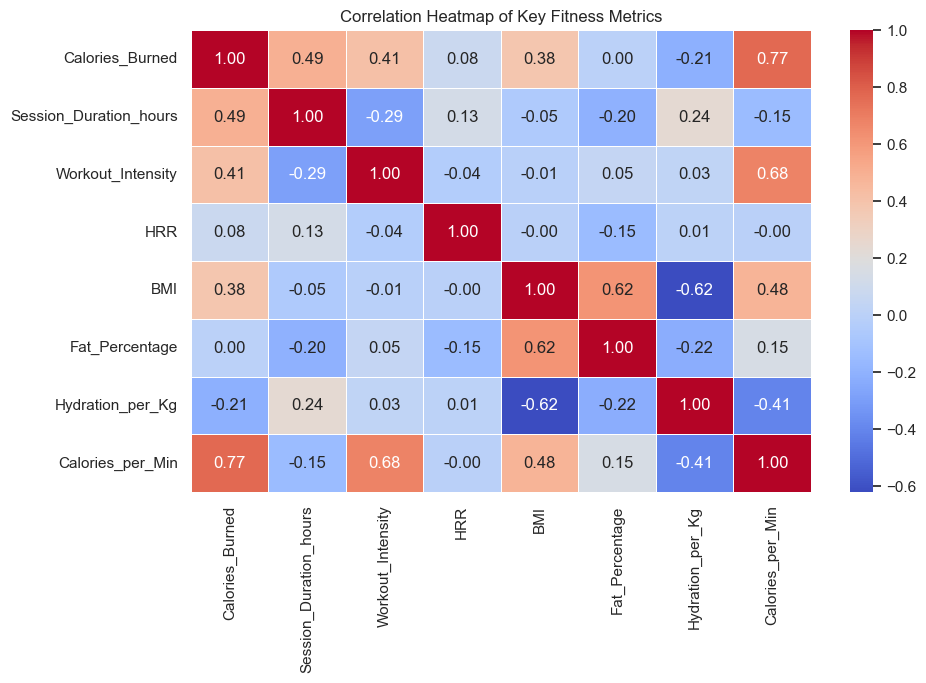

In [771]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric features
features = ['Calories_Burned', 'Session_Duration_hours', 'Workout_Intensity', 
            'HRR', 'BMI', 'Fat_Percentage', 'Hydration_per_Kg', 'Calories_per_Min']

corr_matrix = df[features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Key Fitness Metrics")
plt.show()


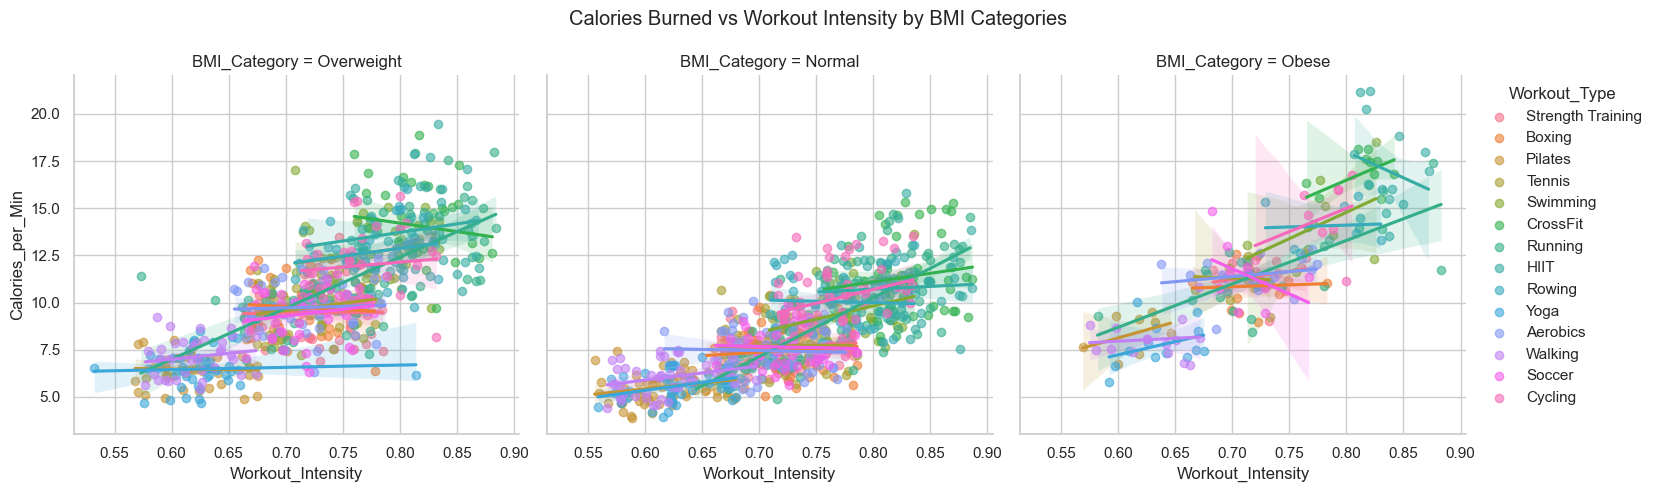

In [772]:
g = sns.lmplot(x='Workout_Intensity', y='Calories_per_Min', col='BMI_Category', 
               hue='Workout_Type', data=df, height=5, aspect=1, scatter_kws={'alpha':0.6})
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Calories Burned vs Workout Intensity by BMI Categories")
plt.show()

>workout intensity formula caloeries burned per min 

# Inferential Statistics 

>T test

>Hypothesis 1: Workout Type significantly affects Calories Burned

>Test: One-Way ANOVA

>Null (H₀): No difference in average calories burned across workout types

>Alt (H₁): At least one workout type burns significantly more

In [777]:
from scipy.stats import f_oneway

groups = [df[df['Workout_Type'] == wt]['Calories_Burned'] for wt in df['Workout_Type'].unique()]
f_stat, p_val = f_oneway(*groups)
print(f"F-Statistic: {f_stat:.3f}, P-value: {p_val:.4f}")

F-Statistic: 67.212, P-value: 0.0000


>Hypothesis 2: Experienced users have higher HRR and Calories/Min

In [779]:
groups_HRR = [df[df['Experience_Level'] == level]['HRR'] for level in df['Experience_Level'].unique()]
f_stat_hrr, p_val_hrr = f_oneway(*groups_HRR)

# Calories per Min
groups_cal = [df[df['Experience_Level'] == level]['Calories_per_Min'] for level in df['Experience_Level'].unique()]
f_stat_cal, p_val_cal = f_oneway(*groups_cal)

print(f"HRR - F: {f_stat_hrr:.2f}, P: {p_val_hrr:.4f}")
print(f"Calories/Min - F: {f_stat_cal:.2f}, P: {p_val_cal:.4f}")

HRR - F: 7.84, P: 0.0000
Calories/Min - F: 10.74, P: 0.0000


>Hypothesis 3: Higher BMI = Lower Hydration per Kg

In [781]:
from scipy.stats import pearsonr

corr, p_val = pearsonr(df['BMI'], df['Hydration_per_Kg'])
print(f"Pearson r: {corr:.3f}, P-value: {p_val:.4f}")

Pearson r: -0.621, P-value: 0.0000


>Fat % and HRR are positively correlated

In [783]:
from scipy.stats import spearmanr

corr, p_val = spearmanr(df['Fat_Percentage'], df['HRR'])
print(f"Spearman r: {corr:.3f}, P-value: {p_val:.4f}")

Spearman r: -0.129, P-value: 0.0000


>Chi-Square Test: Association between BMI_Category and Workout_Type

In [786]:
from scipy.stats import chi2_contingency

# Cross-tabulation
contingency = pd.crosstab(df['BMI_Category'], df['Workout_Type'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi2: {chi2:.3f}, P-value: {p:.4f}")


Chi2: 15.152, P-value: 0.9545


# 